# Air BNB Exploratory Data Analysis

A dataset of Air BNB data from NYC during 2019 can be analyzed to find interesting trends in the data.

In [114]:
# Importing Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Task 1: Data Cleaning
Examine the data, there may be some anomalies in the data, and you will have to clean the data
before you move forward to other tasks. Explain what you did to clean the data.

First, use pandas to identify the location of any missing data or duplicate data.

In [115]:
# Importing datafile and identifying missing data
df = pd.read_csv('AB_NYC_2019.csv')
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [116]:
# Searching for presence of duplicates
df.duplicated().sum()

0

As we can see, there are no duplicate elements but there is some missing data. Since the 'name', 'last_review', and 'host_name' entries are not very important, these will not be modified. However, we can modify the missing values for 'reviews_per_month' as this data could be used later in some form of data analysis. Therefore, we will replace all the NaN values with 0.

In [117]:
# Replacing all NaN values for 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Now the missing and duplicate data has been corrected. Next we call 'describe()' in order to further analyze the data to see if any more cleaning is necessary.

In [118]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


This dataset consists of around 50,000 entries and therefore it is quite robust. Due to the size of this dataset, the differences in the mean and median values for some quantitative elements is not enough that outliers will be removed. Also, the nature of the source of the data would suggest that there would be a high density of low price listing with sparser high price listings. We can analyze this pricing data below.

In [119]:
# Determining IQR of price data
price_q1 = np.percentile(df['price'], 25, method='midpoint')
price_q3 = np.percentile(df['price'], 75, method='midpoint')
price_iqr = price_q3 - price_q1
print("Price IQR: ", price_iqr)

Price IQR:  106.0


In [120]:
# Finding number of upper outliers
upperbound = price_q3 + 1.5 * price_iqr
outlier_count = np.array(df['price'] >= upperbound).sum()
print("Upper Bound: ", upperbound)
print("Number of Outliers: ", outlier_count)

Upper Bound:  334.0
Number of Outliers:  2977


### Analysis
The first step in data cleaning is to deal with missing and duplicate data. Most missing data was unimportant qualitative data and the missing quantitative data was replaced with the value 0 since it was 'reviews_per_month'. Fortunately, no duplicate data was found so it did not have to be dealt with.

As for dealing with outliers, the discrepancy between mean and median values for quantitative elements can largely be explained by the nature of the data, so no outliers were removed. More analysis was done with price data, as it is a commonly used element in this data analysis, and found that there was a significant amount of outliers and this combined with the large datset justifies not removing the outlying data.

## Task 2: Neighborhood Pricing
Examine how the prices of the Airbnb changes with the change in the neighborhood.
- Find Top 5 and Bottom 5 neighborhoods based on the price of the Airbnb in that neighborhood (select only neighborhoods with more than 5 listings).
- b. Analyze the price variation between different neighborhood group and plot these trends. 

First we remove all of the data from neighborhoods that have less than five listings in them.

In [121]:
# Creating new dataframe with listings from neighborhoods with less than 5 listings removed
counts = df['neighbourhood'].value_counts()
df2 = df.loc[df['neighbourhood'].isin(counts.index[counts > 4])]

Next we group the neighborhoods and take the mean price values for each neighborhood. We can print the top and bottom five neighborhoods and their mean price.

In [122]:
# Grouping of neighborhoods and sorting by mean price
df_neighborhood_mean = df2.groupby('neighbourhood')['price'].mean().sort_values()

# Displaying the five most expensive neighborhoods
top5 = df_neighborhood_mean.tail(5)
print(top5)

neighbourhood
Flatiron District    341.925000
Battery Park City    367.557143
Riverdale            442.090909
Sea Gate             487.857143
Tribeca              490.638418
Name: price, dtype: float64


In [123]:
# Displaying the five least expensive neighborhoods
bottom5 = df_neighborhood_mean.head(5)
print(bottom5)

neighbourhood
Bull's Head    47.333333
Hunts Point    50.500000
Tremont        51.545455
Soundview      53.466667
Bronxdale      57.105263
Name: price, dtype: float64


Now we create a bar graph of the top five neighborhoods based on Airbnb price.

In [124]:
# Reformat top five neighborhoods into a df
top5_df=pd.DataFrame(top5)
top5_df.reset_index(inplace=True)
top5_df

,neighbourhood,price
0,Flatiron District,341.925000
1,Battery Park City,367.557143
2,Riverdale,442.090909
3,Sea Gate,487.857143
4,Tribeca,490.638418


Text(0.5, 0, 'Neighborhood')

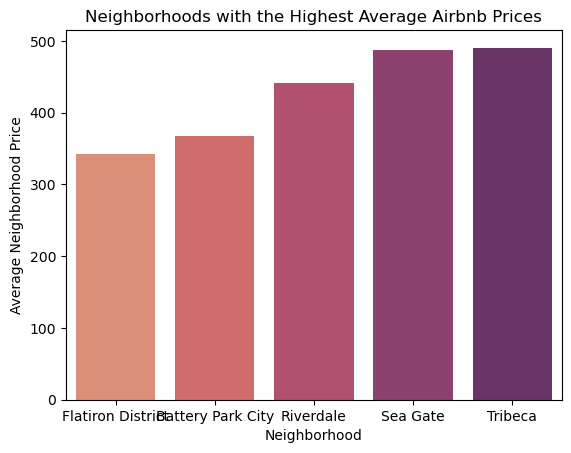

In [125]:
# Create a bar graph
top5_graph = sns.barplot(data=top5_df, x="neighbourhood", y="price", palette = "flare")
top5_graph.set_title('Neighborhoods with the Highest Average Airbnb Prices')
top5_graph.set_ylabel('Average Neighborhood Price')
top5_graph.set_xlabel('Neighborhood')

Now we create a bar graph of the bottom five neighborhoods based on Airbnb price.

In [126]:
# Reformat bottom five neighborhoods into a df
bottom5_df=pd.DataFrame(bottom5)
bottom5_df.reset_index(inplace=True)
bottom5_df

,neighbourhood,price
0,Bull's Head,47.333333
1,Hunts Point,50.500000
2,Tremont,51.545455
3,Soundview,53.466667
4,Bronxdale,57.105263


Text(0.5, 0, 'Neighborhood')

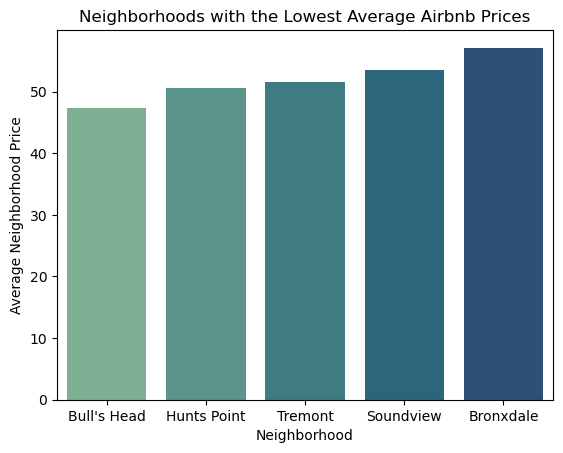

In [127]:
# Create a bar graph
bottom5_graph = sns.barplot(data=bottom5_df, x="neighbourhood", y="price", palette = "crest")
bottom5_graph.set_title('Neighborhoods with the Lowest Average Airbnb Prices')
bottom5_graph.set_ylabel('Average Neighborhood Price')
bottom5_graph.set_xlabel('Neighborhood')

Next we will analyze the variation statistics of price for Airbnbs in each neighborhood group or borough of NYC. We start by grouping the data by borough and sorting the neighborhoods in order of increasing standard deviation of prices.

In [128]:
# Grouping the data by borough
borough = df2.groupby('neighbourhood_group')['price'].std().sort_values()
print(borough)

neighbourhood_group
Bronx            106.904817
Queens           167.162656
Brooklyn         186.885560
Staten Island    281.804151
Manhattan        291.383183
Name: price, dtype: float64


Now that we have our data, we process it into a datafram and visualize it using a bar graph.

In [129]:
# Reformat borough standard deviations into a df
borough_df=pd.DataFrame(borough)
borough_df.reset_index(inplace=True)
borough_df


,neighbourhood_group,price
0,Bronx,106.904817
1,Queens,167.162656
2,Brooklyn,186.885560
3,Staten Island,281.804151
4,Manhattan,291.383183


Text(0.5, 0, 'Borough')

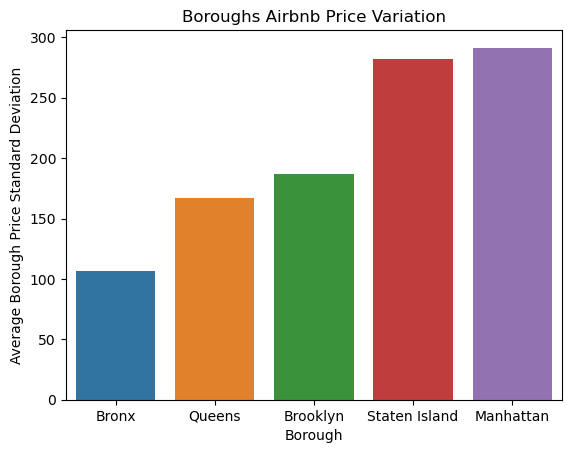

In [130]:
# Create a bar graph
borough_graph = sns.barplot(data=borough_df, x="neighbourhood_group", y="price")
borough_graph.set_title('Boroughs Airbnb Price Variation')
borough_graph.set_ylabel('Average Borough Price Standard Deviation')
borough_graph.set_xlabel('Borough')

### Analysis
As demonstrated by the previous visuals, the neighborhoods of the Flatiron District, Battery Park City, Riverdale, Sea Gate, and Tribeca have the highest average Airbnb cost in increasing order. We can also see that Bronxdale, Soundview, Tremont, Hunts Point, and Bull's Head have the lowest average Airbnb cost in decreasing order. 

In addition to this, the above bar plot demonstrates that the Airbnb price variation is the greatest in the Manhattan borough and the least in the Bronx borough.

## Task 3: Pearson Coefficient Analysis
Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs
of these variables. Show the result with a heat map and find out most positive and negative
correlations.

The features I will chose for analysis are the price, minimum nights stayed, number of reviews, total host listings, annual availability, latitude, and longitude. We begin by creating a copy of the original dataframe inclduing only the features of interest. Then create a plot of the correlation heatmap using seaborn in order to identify any interesting correlations.

In [131]:
# Creating a new dataframe with only elements of particular interest
# df = df.rename(columns={"x": "new_x"})
df3 = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 
          'availability_365', 'latitude', 'longitude']].copy()
df3 = df3.rename(columns={"Price": "price", "minimum_nights": "Minimum Nights Stayed", "number_of_reviews": "# of Reviews", 
                         "calculated_host_listings_count": "# of Listings by Host", "availability_365": "Annual Availability",
                         "latitude": "Latitude", "longitude": "Longitude"})

Text(0.5, 1.0, 'Correlation Heatmap')

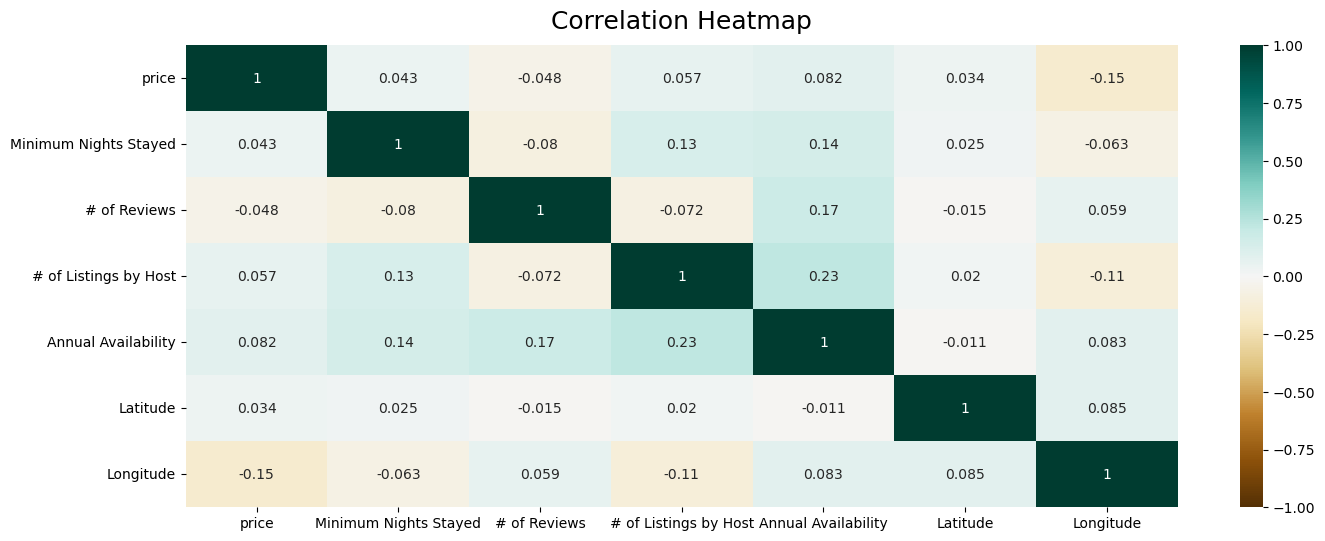

In [132]:
# Create the plot for the correlation heatmap
plt.figure(figsize=(16, 6))
correlation_graph = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
correlation_graph.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

### Analysis
Overall, the features contained in this dataset do not show any extremely strong correlations. The strongest positive correlation was between annual availability of a location and the number of listings by that particular host. This shows that hosts that have a large amount of total listings have a weak correlation with having their listings be available for a large part of the year. This makes sense as more experienced hosts are more likely to have their listings up for a larger part of the year.

The strongest negative correlation was between price and longitude, indicating that there is a weak correlation showing that as the listing moves further East the prices increase. I can not really explain this correlation as I do not have the knowledge necessary to understand the connection between the longitudinal location of a listing and its price.

Other than these correlations there is a weak positive correlation between annual availability and the number of reviews which makes sense as a property that is available more often will likely get reviews more. This also explains the positive correlation between the annual availability and the minimum nights stayed as a listing that is available for longer is more likely to have longer stays. This set of correlations also explains the positive correlation between the minimum nights stayed and the number of listings by a host, as these more experienced hosts likely have more availbility meaning there will be a larger minimum nights stayed.

There also exists another weak negative correlation betweeen price and the number of listings by host. This makes sense as if a host were to have a lot of listings it is more likely that these listings are of a lower price. It is hard to make a lot of listings that are of a higher price.

## Task 4: Latitude and Longitude
The Latitude and Longitude of all the Airbnb listings are provided in the dataset.
- Plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the neighborhood group feature. 
- Now again, plot a scatter plot based on these coordinates, where the points represent the location of an Airbnb, and the points are color coded based on the price of the particular Airbnb, where price of the listing is less than 1000. Looking at the graph can you tell which neighborhood group is the most expensive. 

Using seaborn create a scatterplot with the longitude on the x-axis and latitude on the y-axis. Use the hue based on the 'neighbourhood_group' (renamed to 'Borough') feature and this will effectively create a map of the five boroughs of NYC.

Text(0, 0.5, 'Latitude')

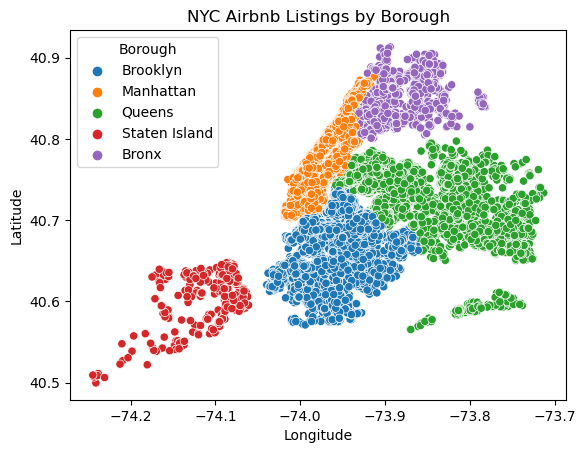

In [133]:
# Creating scatterplot of latidudes and longitudes
borough2_df = df.copy()
borough2_df = borough2_df.rename(columns={"neighbourhood_group": "Borough"})
borough_scatterplot = sns.scatterplot(data = borough2_df, x = "longitude", y = "latitude", hue = "Borough")
borough_scatterplot.set_title('NYC Airbnb Listings by Borough')
borough_scatterplot.set_xlabel('Longitude')
borough_scatterplot.set_ylabel('Latitude')

Next to create a scatter plot based on these coordiantes with the points being color coded based on the price. Also, only prices below 1,000 will be used. To begin, create a new dataframe only including listings that are below a price of 1,000. Then use this dataframe as the basis for the scatterplot based on listing prices.

Text(0, 0.5, 'Latitude')

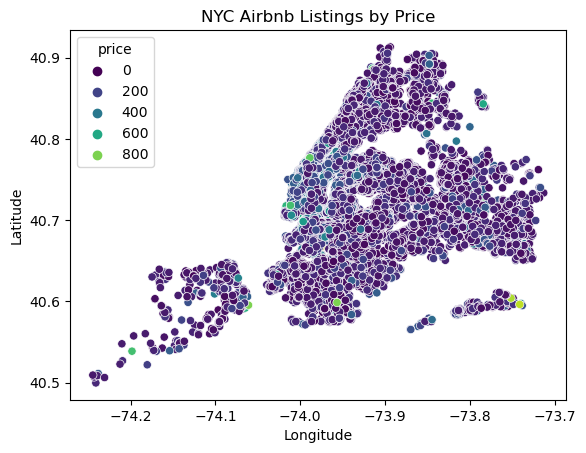

In [134]:
# Create a new dataframe including only entries with price below 1000
df4 = df[df.price < 1000]

# Create the scatterplot using the price for the hue
price_scatterplot = sns.scatterplot(data = df4, x = "longitude", y = "latitude", hue = "price", palette = "viridis")
price_scatterplot.set_title('NYC Airbnb Listings by Price')
price_scatterplot.set_xlabel('Longitude')
price_scatterplot.set_ylabel('Latitude')

### Analysis
Now we can see that using scatterplots with the 'hue' parameter we can identify patterns based on the location of the Airbnb listing. In the first graph the scatterplot was able to effectively create a map of NYC and even mark where the five boroughs are. The second graph indicates which areas have more expensive listing, with the lighter colors representing expensive listings and darker colors representing cheaper ones.

## Task 5: Word Clouds
Word clouds are useful tool to explore the text data. Extract the words from the name of the Airbnb
and generate a word cloud. 

The first step is to create an array to store all of the names. In order to create a word cloud, a string is necessary in order to store all of the words from all of the names. First we will create an array to store all of the names from the dataset and have a function to split those names into each names' words.

In [135]:
# Create an array to store the names and add each name to the array
names = []
for name in df.name:
    names.append(name)
    
# Create a function to split the array into individual words
def name_splitter(name):
    word = str(name).split()
    return word

Next create an array to store all of the words from all of the names and append all of the words to the new array. Then convert this newly created array to a string with spaces separating each word.

In [136]:
# Create an array to store all of the words, then add each word from each name to the array
words = []
for name in names:
    for word in name_splitter(name):
        # Lowercasing words to that same words are counted together
        word = word.lower()
        words.append(word)

# Now convert the list of words to a string
words_string = " ".join(words)

Now install and import the word cloud package including 'STOPWORDS' to filter out certain words that would not belong in a word cloud. Then we generate the world cloud.

In [137]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

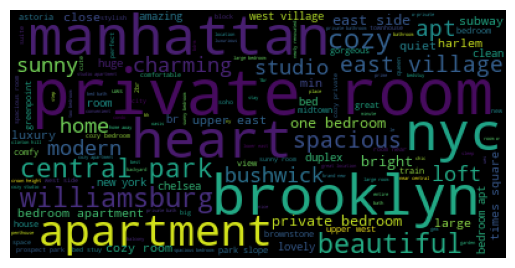

In [138]:
# Import word cloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create the word cloud and apply the 'words' array
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 500)
word_cloud.generate(words_string)
plt.imshow(word_cloud)
plt.axis('off')

### Analysis
From this word cloud we can see that the location of the Airbnb is very commonly included in the name of the listing. We also see words that describe each listing such as qualitative elements such as "sunny" or "charming", as well as describing locations as "one bedroom" or "studio" apartments. It is clear how hosts describe Airbnbs by the nature of this word cloud.

## Task 6: Busiest Areas
Find out which areas have the busiest hosts. Are there any
reasons why these hosts are the busiest? Consider factors such as availability, price, review, etc..
Bolster you reasoning with different plots and correlations.

First find the twenty five busiest hosts in order to determine how many listings a host should have to be considered "busy".

In [139]:
# Finding the twenty five busiest hosts
df6 = df.groupby('host_id')['calculated_host_listings_count'].mean().sort_values()
busy_hosts = df6.tail(25)
print(busy_hosts)

host_id
50760546      31.0
238321374     32.0
76104209      33.0
113805886     33.0
213781715     33.0
119669058     34.0
25237492      34.0
19303369      37.0
2119276       39.0
26377263      43.0
190921808     47.0
2856748       49.0
205031545     49.0
120762452     50.0
1475015       52.0
7503643       52.0
200380610     65.0
22541573      87.0
61391963      91.0
12243051      96.0
16098958      96.0
137358866    103.0
30283594     121.0
107434423    232.0
219517861    327.0
Name: calculated_host_listings_count, dtype: float64


Based on the above results, any host that has at least 30 listings will be considered busy. Create a scatterplot color coded by borough in order to figure out where the busy hosts tend to make their listings

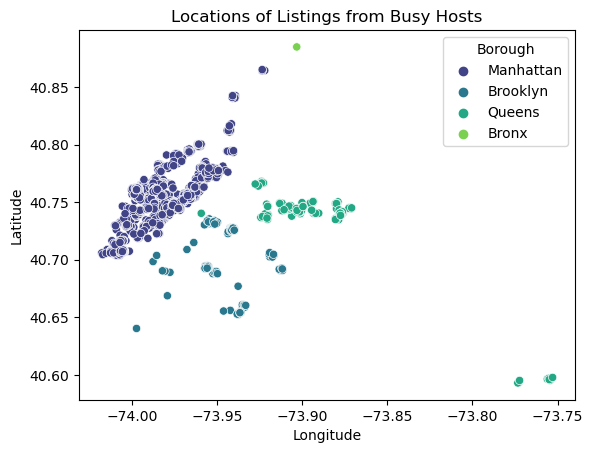

In [140]:
# Create a new dataframe including only listings from hosts with at least 30 listings
busy_hosts_df = df[df.calculated_host_listings_count >= 30]

# Create the scatterplot using the borough for the hue
busy_hosts_scatterplot = sns.scatterplot(data = busy_hosts_df, x = "longitude", y = "latitude", 
                                    hue = "neighbourhood_group", palette = "viridis")
busy_hosts_scatterplot.set_title('Locations of Listings from Busy Hosts')
busy_hosts_scatterplot.set_xlabel('Longitude')
busy_hosts_scatterplot.set_ylabel('Latitude')
plt.legend(title = 'Borough')

As seen above, busy hosts tend to have most of their listings in Manhattan while having none on Staten Island and nearly none in the Bronx. To analyze general trends based on the number of listings by hosts the heat map created in **Task 3** can be truncated to include interesting potential relationships.

Text(0.5, 1.0, 'Correlation Heatmap')

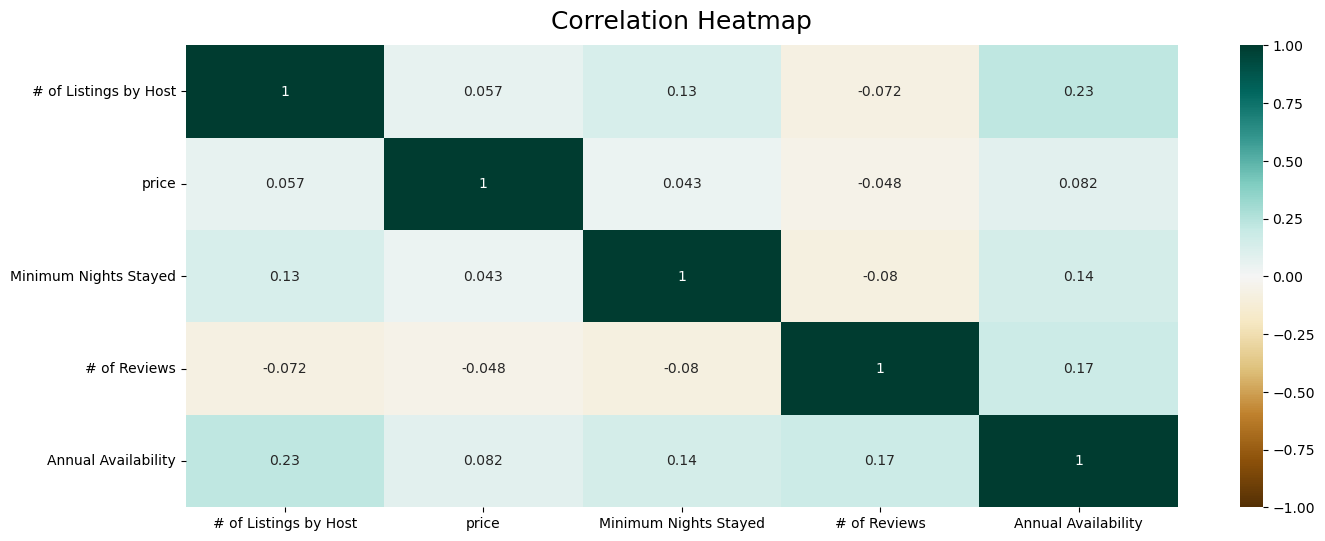

In [141]:
# Creating a new dataframe with only elements of particular interest
# df = df.rename(columns={"x": "new_x"})
df_corr = df[['calculated_host_listings_count', 'price', 'minimum_nights', 'number_of_reviews', 
          'availability_365']].copy()
df_corr = df_corr.rename(columns={"Price": "price", "minimum_nights": "Minimum Nights Stayed", "number_of_reviews": "# of Reviews", 
                         "calculated_host_listings_count": "# of Listings by Host", "availability_365": "Annual Availability"})

# Create the plot for the correlation heatmap
plt.figure(figsize=(16, 6))
correlation_graph = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
correlation_graph.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

It can be noted that there is a relatively strong positive correlation between the number of listings by the host and the annual availability of the property. This makes sense as hosts that have more listings are more likely to be very active in their hosting, which would imply not only that these busy hosts would create more listings but also would make these hostings available for a greater part of the year. Similarly, the relatively strong positive correlation between the number of listings by the host and the minimum nights stayed in the listing can be explained by the fact that more experienced hosts with more listings are more likely to allow longer stays at their listings. Other correlations are not too significant but can still be analyzed.

However, by printing the summary statistics for the original dataframe and the busy hosts dataframe a comparison can be made to find any interesting trends.

In [142]:
df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,112.781327
std,240.154170,20.510550,44.550582,131.622289
min,0.000000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,45.000000
75%,175.000000,5.000000,24.000000,227.000000
max,10000.000000,1250.000000,629.000000,365.000000


In [143]:
busy_hosts_df[[ 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,1927.000000,1927.000000,1927.000000,1927.000000
mean,213.865594,25.408926,2.610275,281.225221
std,141.055527,13.192279,4.162978,93.375386
min,24.000000,1.000000,0.000000,0.000000
25%,130.000000,29.000000,0.000000,243.000000
50%,198.000000,30.000000,1.000000,322.000000
75%,255.000000,30.000000,4.000000,345.000000
max,1170.000000,180.000000,30.000000,365.000000


As we can see the central tendencies of the datasets are very different and follow what was indicated on the heatmap. It is clear that the busiest locations have significantly higher mean and median price, minimum nights stayed, and annual availability while they also had a lower mean number of reviews. In order to create a visual of these patterns scatter plots will be created with these factors in mind.


Text(0, 0.5, 'Price')

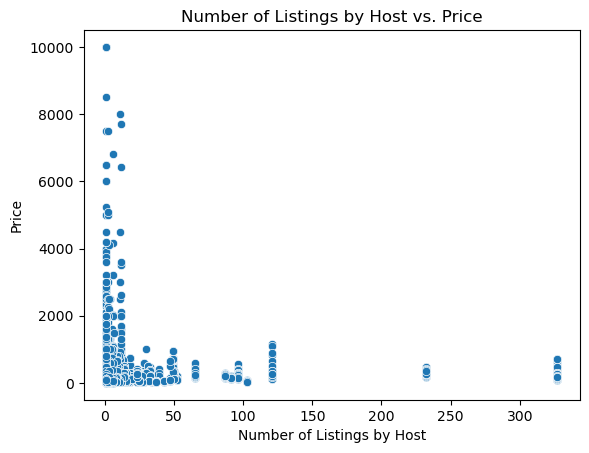

In [144]:
# Creating scatterplot of prices
price_scatter = sns.scatterplot(data = df, x = "calculated_host_listings_count", y = "price")
price_scatter.set_title('Number of Listings by Host vs. Price')
price_scatter.set_xlabel('Number of Listings by Host')
price_scatter.set_ylabel('Price')

Text(0, 0.5, 'Minimum Nights Stayed')

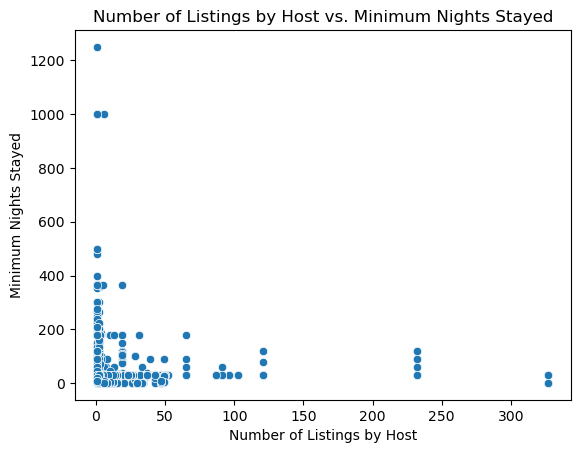

In [145]:
# Creating scatterplot of minimum nights stayed
nights_scatter = sns.scatterplot(data = df, x = "calculated_host_listings_count", y = "minimum_nights")
nights_scatter.set_title('Number of Listings by Host vs. Minimum Nights Stayed')
nights_scatter.set_xlabel('Number of Listings by Host')
nights_scatter.set_ylabel('Minimum Nights Stayed')

Text(0, 0.5, 'Number of Reviews')

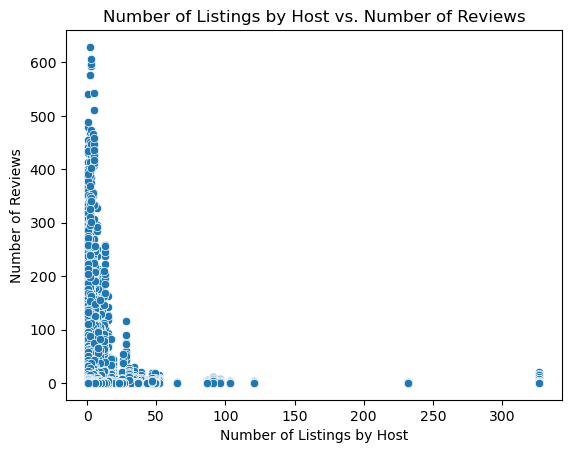

In [146]:
# Creating scatterplot of number of reviews
numrev_scatter = sns.scatterplot(data = df, x = "calculated_host_listings_count", y = "number_of_reviews")
numrev_scatter.set_title('Number of Listings by Host vs. Number of Reviews')
numrev_scatter.set_xlabel('Number of Listings by Host')
numrev_scatter.set_ylabel('Number of Reviews')

Text(0, 0.5, 'Annual Availability')

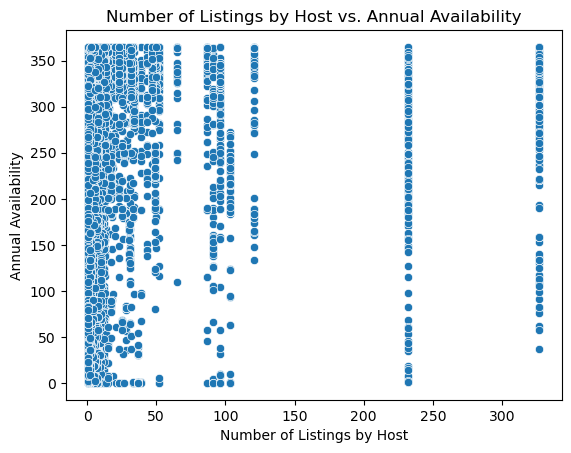

In [147]:
# Creating scatterplot of annual availability
annual_scatter = sns.scatterplot(data = df, x = "calculated_host_listings_count", y = "availability_365")
annual_scatter.set_title('Number of Listings by Host vs. Annual Availability')
annual_scatter.set_xlabel('Number of Listings by Host')
annual_scatter.set_ylabel('Annual Availability')

### Analysis
The correlation heatmap indicates weak correlations between these variables based on how busy the host is despite the summary statistics suggesting large differences in these statistics. However, the scatterplot reveals that due to the large amount of data from hosts with less listings still having properties with high prices, high minimum time stayed, and high annual availabiltiy weakens this correlation. It is still important to note that the busiest hosts in the city have significantly higher average prices, minimum nights stayed, and annual availablity. It is clear that these busy hosts have a lot of money at their disposal to keep up so many listings and are therefore able to rent out the Airbnb for more of the year and for longer periods of times. This also explains the signifantly lower average number of reviews since the busier hosts tend to have longer term stays, meaning they get less customers overall and therefore recieve less reviews.

## Task 7: Room Types
Create two plots (at least one unique plot not used above) of your own using the dataset that you
think reveals something very interesting. Explain what it is, and anything else you learned. 

One feature that has not been explored yet is room types, and using a bar plot a lot of imformation can be gained about them. Group the listings by room type and the borough they are located in and find the mean price for each room type for each borough. Using a scatter plot the average prices of each room type can be indicated for each individual borough. This can reveal not only how expensive it is to rent an Airbnb out in each borough but also what types of rooms are most expensive and which borough makes the most sense to rent a certain room type in.

In [148]:
# Grouping the data by room type and borough and finding their average prices
room_prices = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().sort_values()
print(room_prices)

room_type        neighbourhood_group
Shared room      Brooklyn                50.527845
                 Staten Island           57.444444
                 Bronx                   59.800000
Private room     Staten Island           62.292553
                 Bronx                   66.788344
Shared room      Queens                  69.020202
Private room     Queens                  71.762456
                 Brooklyn                76.500099
Shared room      Manhattan               88.977083
Private room     Manhattan              116.776622
Entire home/apt  Bronx                  127.506596
                 Queens                 147.050573
                 Staten Island          173.846591
                 Brooklyn               178.327545
                 Manhattan              249.239109
Name: price, dtype: float64


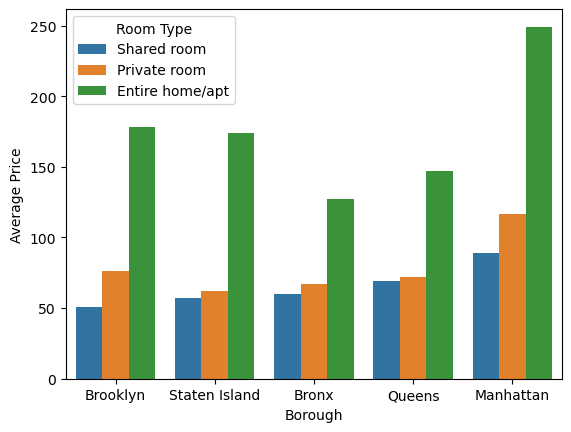

In [149]:
# Create a barplot of prices of different room types in different boroughs
room_prices_df = pd.DataFrame(room_prices)
room_prices_df.reset_index(inplace=True)
room_prices_df.rename(columns = {'room_type':'Room Type', 'price':'Average Price', 'neighbourhood_group': 'Borough'}, inplace=True)
room_prices_bar = sns.barplot(data = room_prices_df, x="Borough", y="Average Price", hue = "Room Type")

The data shows that shared rooms are the least expensive and entire homes or apartments are the most expensive, as expected. It is also clear that certain room types are cheaper in certain boroughs. For example, on average the cheapest entire homes are located in the Bronx while the cheapest private rooms are on Staten Island. This also gives insights on to just how expensive it is to rent in Manhattan, with the average price for a shared room in manhattan being higher than all of the average prices for for shared **AND** private rooms in all of the other boroughs.

Now that the prices of different room types in the five boroughs have been determined, let's find the count of each of these room types across the boroughs.

In [150]:
# Grouping the data by room type and borough and finding the count of rooms types in each borough
room_count = df.groupby(['room_type', 'neighbourhood_group'])['price'].count().sort_values()
print(room_count)

room_type        neighbourhood_group
Shared room      Staten Island              9
                 Bronx                     60
Entire home/apt  Staten Island            176
Private room     Staten Island            188
Shared room      Queens                   198
Entire home/apt  Bronx                    379
Shared room      Brooklyn                 413
                 Manhattan                480
Private room     Bronx                    652
Entire home/apt  Queens                  2096
Private room     Queens                  3372
                 Manhattan               7982
Entire home/apt  Brooklyn                9559
Private room     Brooklyn               10132
Entire home/apt  Manhattan              13199
Name: price, dtype: int64


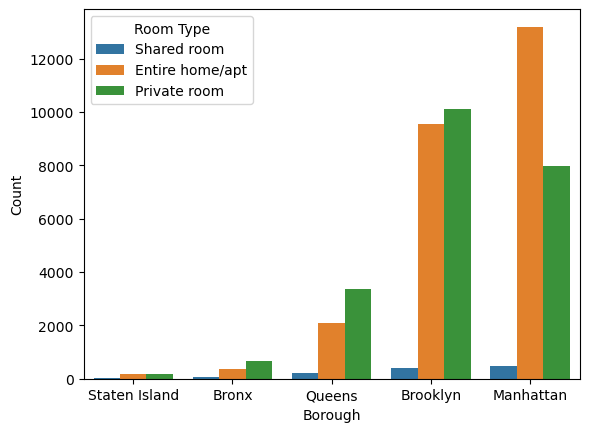

In [151]:
# Create a barplot of count of different room types in different boroughs
room_count_df = pd.DataFrame(room_count)
room_count_df.reset_index(inplace=True)
room_count_df.rename(columns = {'room_type':'Room Type', 'price':'Count', 'neighbourhood_group': 'Borough'}, inplace=True)
room_count_df
room_count_bar = sns.barplot(data = room_count_df, x="Borough", y="Count", hue = "Room Type")

The bar plot above gives more insights into the types of listings in each borough. For example, while private rooms are the most popular listings in most boroughs in Manhattan listings of entire apartments are far more common. It is also interesting to see that while the number of shared rooms in each borough remains mostly the same, the number of private room and entire apartment listings are vastly different across the boroughs. This graphic also explains why Manhattan has such expensive average listings, since it has the largest amount of listings of the most expensive room type.

Finally, a scatterplot will be used in order to map out where these room types are located geographically.

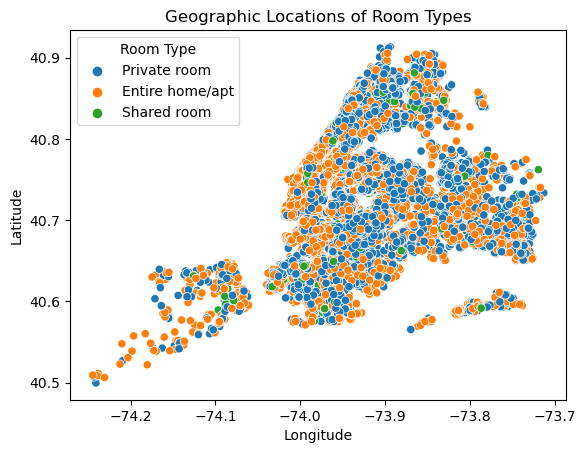

In [152]:
# Creating a scatterplot of room types according to geographic coordinates
room_scatterplot = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "room_type")
room_scatterplot.set_title('Geographic Locations of Room Types')
room_scatterplot.set_xlabel('Longitude')
room_scatterplot.set_ylabel('Latitude')
plt.legend(title = "Room Type")

This graphic shows where large groups of private rooms and entire apartments can be located throughout NYC, also including the sparsely located shared rooms. Through this graphic it can be seen that areas such as Lower Manhattan rent out a large amount of entire apartments while Upper Manhatten has a larger amount of private room listings. Scatterplots like these can give a lot of insights about the types of rooms being rented out throughout NYC.